HOW TO CLEAN DATA WITH PYTHON
Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?



Inspect the Data!
1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.


3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue
5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.


6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.


8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

11.
Drop those duplicates using the .drop_duplicates() function.


12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

Get Creative
15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

#### Inspect the Data! 1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state. Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [36]:
import pandas as pd
import re
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\Shoaib sukhmir\AI_Data_science\All_csvs\states0.csv")
data

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F


In [37]:
data['split_gender']=data['GenderPop'].str.split("_")

In [38]:
data

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,split_gender
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F,"[2341093M, 2489527F]"
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F,"[384160M, 349215F]"
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F,"[3299088M, 3342840F]"
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F,"[1451913M, 1506295F]"
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F,"[19087135M, 19334329F]"
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F,"[2648667M, 2630239F]"


In [39]:
data[['Male','Female']]=pd.DataFrame(data['split_gender'].tolist())

In [40]:
df=data.drop('split_gender',axis=1)

In [41]:
df

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F,19087135M,19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F,2648667M,2630239F


In [54]:
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True)
#df['Female']=df['Female'].replace('F','')
df['Female'] = df['Female'].replace({'F': ''}, regex=True)

df['Female']=df['Female'].astype(float)
df['Income']=df['Income'].astype(float)

In [55]:
df.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Male           object
Female        float64
dtype: object

Text(0, 0.5, 'Avarage income in a state')

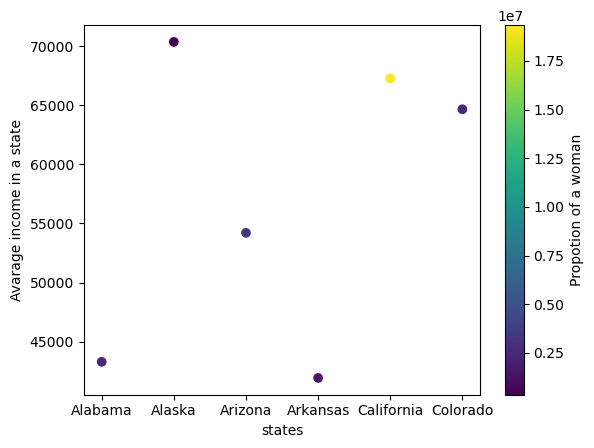

In [56]:
female=df['Female']
plt.scatter(df['State'],df['Income'],c=female)
cbar=plt.colorbar()
cbar.set_label("Propotion of a woman")
plt.xlabel("states")
plt.ylabel("Avarage income in a state")



#### It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them? Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [148]:
import glob

file_paths = glob.glob(r'C:\Users\Shoaib sukhmir\AI_Data_science\All_csvs/*.csv')
dataframe=[]


In [149]:
for file_path in file_paths:
    df=pd.read_csv(file_path)
    dataframe.append(df)

In [150]:
print(dataframe)

[   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   
5           5    Colorado   5278906   20.78%  69.90%   3.55%   0.57%   2.66%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  
5     NaN  $64,657.80     2648667M_2630239F  ,    Unnamed: 0                 State  TotalPop             Hispanic  \
0           0              Colorado   5278906

In [151]:
us_census=pd.concat(dataframe,ignore_index=True)
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


#### Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

# NO! because each column has different data type

#### Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [152]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


#### Regex to the Rescue 5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type

In [153]:
import re
us_census['Income'] = us_census['Income'].replace({'\$': '', ',': ''}, regex=True)
us_census['Income']

0              43296.36 
1              70354.74 
2              54207.82 
3              41935.63 
4              67264.78 
5              64657.80 
6     64657.801787164906
7       76146.5605875153
8      61827.97663551402
9      75466.36363636363
10    50690.194986743794
11     50811.08205128205
12     50811.08205128205
13     73264.42628205128
14     48017.31543624161
15     59587.04887459807
16     48616.22784810127
17     53017.75304136253
18     53017.75304136253
19    53885.612648221344
20     45285.80253623189
21     44957.99376114082
22     49181.97435897436
23     78765.40072463769
24     78765.40072463769
25     72838.93672627235
26     51201.83003663004
27       62820.833959429
28     38909.91920731707
29     49763.98772563177
30     49763.98772563177
31    47645.682835820895
32    55916.469696969696
33    55526.525073746314
34      68728.8595890411
35     76581.08341708542
36     76581.08341708542
37     47329.96787148595
38     64290.74911292006
39     49937.46413697362


#### Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results.

In [154]:
us_census['split_gender']=us_census['GenderPop'].str.split("_")

In [155]:
us_census[['Male','Female']]=pd.DataFrame(us_census['split_gender'].tolist())

In [156]:
data_f = us_census.drop(['GenderPop', 'split_gender'], axis=1)

data_f.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M,2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M,349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M,3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M,1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M,19334329F


#### Convert both of the columns into numerical datatypes.There is still an M or an F character in each entry! We should remove those before we convert.

In [171]:
data_f['Male'] = data_f['Male'].replace({'M':''}, regex=True)
data_f['Female'] = data_f['Female'].replace({'F':''}, regex=True)


In [175]:
data_f['Male'] = pd.to_numeric(data_f['Male'], errors='coerce').astype(float)
data_f['Female'] = pd.to_numeric(data_f['Female'], errors='coerce').astype(float)
data_f['Income'] = pd.to_numeric(data_f['Income'], errors='coerce').astype(float)



#### Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show! Use matplotlib to make a scatterplot! plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!

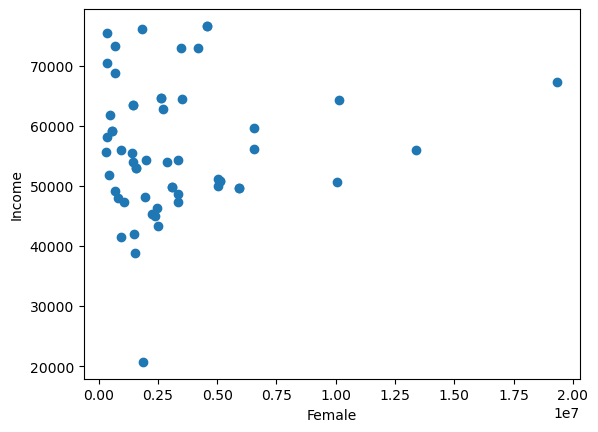

In [181]:

plt.scatter(data_f['Female'],data_f['Income'])

plt.xlabel("Female")
plt.ylabel("Income")
plt.show()

#### Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.We can fill in those nans by using pandas’ .fillna() function.You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.Print out the Women column after filling the nan values to see if it worked!

In [182]:
data_f.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       5
Income        0
Male          0
Female        3
dtype: int64

In [192]:
data_f['Female']=data_f['Female'].fillna(0)

In [200]:
data_f['Pacific']=data_f['Pacific'].fillna(0)


In [201]:
data_f.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       0
Income        0
Male          0
Female        0
dtype: int64

#### We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there

In [203]:
data_f.duplicated()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
dtype: bool

#### Make the scatterplot again. Now, it should be perfect! Your job is secure, for now

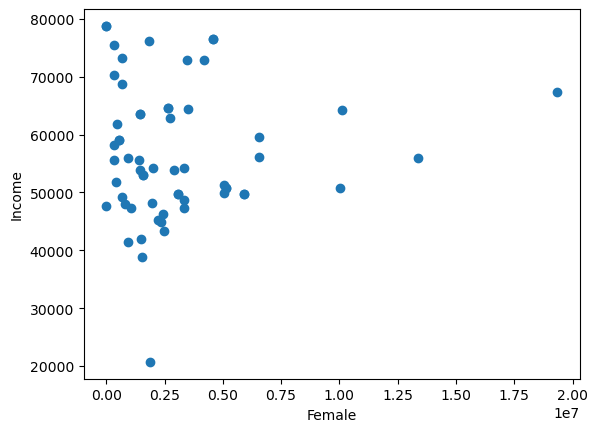

In [204]:
plt.scatter(data_f['Female'],data_f['Income'])

plt.xlabel("Female")
plt.ylabel("Income")
plt.show()

#### Histograms of Races 13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [222]:
data_f[['Hispanic','White','Black','Native','Asian','Pacific']]=data_f[['Hispanic','White','Black','Native','Asian','Pacific']].replace({'\%':''},regex=True)

In [227]:
data_f[['Hispanic','White','Black','Native','Asian','Pacific']]=data_f[['Hispanic','White','Black','Native','Asian','Pacific']].astype(float)

In [232]:
data_f.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Male          float64
Female        float64
dtype: object

In [233]:
data_f.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Male', 'Female'],
      dtype='object')

(array([[36., 15.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  1.],
        [ 1.,  0.,  1.,  1.,  3., 12.,  9., 17., 12.,  4.],
        [32., 16.,  4.,  6.,  1.,  1.,  0.,  0.,  0.,  0.],
        [59.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [58.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [60.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 0.        ,  9.88935738, 19.77871477, 29.66807215, 39.55742954,
        49.44678692, 59.33614431, 69.22550169, 79.11485908, 89.00421646,
        98.89357384]),
 <a list of 6 BarContainer objects>)

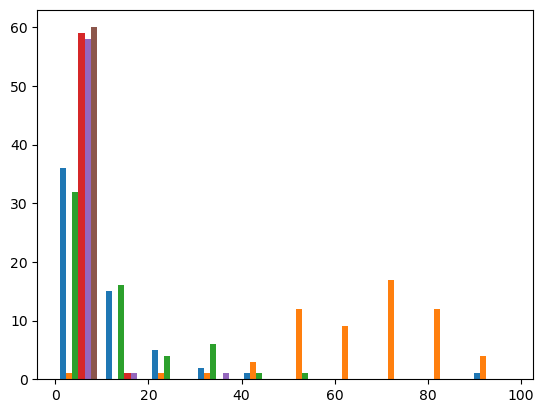

In [236]:
plt.hist(data_f[[ 'Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific']],bins=10)

#### Try to make a histogram for each one!You will have to get the columns into numerical format, and those percentage signs will have to go.Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

(array([37., 16.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.29090909, 11.05117557, 20.81144204, 30.57170852, 40.33197499,
        50.09224147, 59.85250794, 69.61277442, 79.37304089, 89.13330737,
        98.89357384]),
 <BarContainer object of 10 artists>)

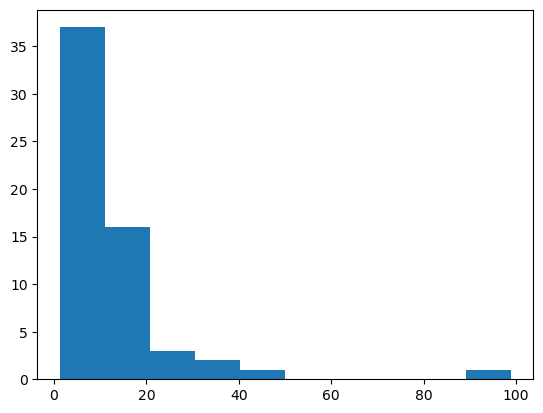

In [239]:
plt.hist(data_f['Hispanic'],bins=10)


(array([ 1.,  0.,  1.,  1.,  3., 10.,  9., 11., 15.,  9.]),
 array([ 0.77361894, 10.09456306, 19.41550717, 28.73645129, 38.05739541,
        47.37833952, 56.69928364, 66.02022776, 75.34117188, 84.66211599,
        93.98306011]),
 <BarContainer object of 10 artists>)

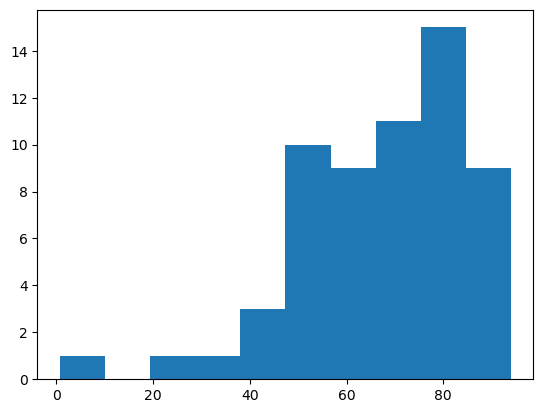

In [240]:
plt.hist(data_f['White'],bins=10)


(array([22., 11.,  8.,  9.,  1.,  3.,  3.,  1.,  1.,  1.]),
 array([ 0.09255919,  5.2609569 , 10.42935461, 15.59775233, 20.76615004,
        25.93454775, 31.10294546, 36.27134318, 41.43974089, 46.6081386 ,
        51.77653631]),
 <BarContainer object of 10 artists>)

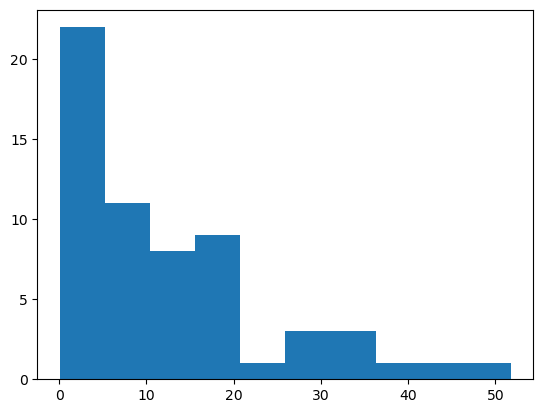

In [241]:
plt.hist(data_f['Black'],bins=10)


(array([53.,  0.,  1.,  1.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([2.81848929e-03, 1.64153664e+00, 3.28025479e+00, 4.91897294e+00,
        6.55769109e+00, 8.19640924e+00, 9.83512740e+00, 1.14738455e+01,
        1.31125637e+01, 1.47512818e+01, 1.63900000e+01]),
 <BarContainer object of 10 artists>)

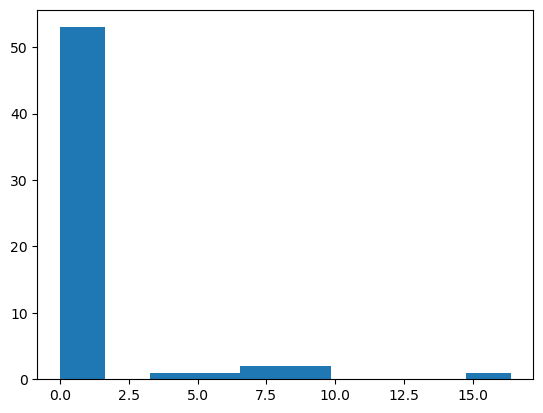

In [242]:
plt.hist(data_f['Native'],bins=10)


(array([45., 10.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.07519729,  3.72688643,  7.37857556, 11.03026469, 14.68195382,
        18.33364295, 21.98533208, 25.63702121, 29.28871034, 32.94039948,
        36.59208861]),
 <BarContainer object of 10 artists>)

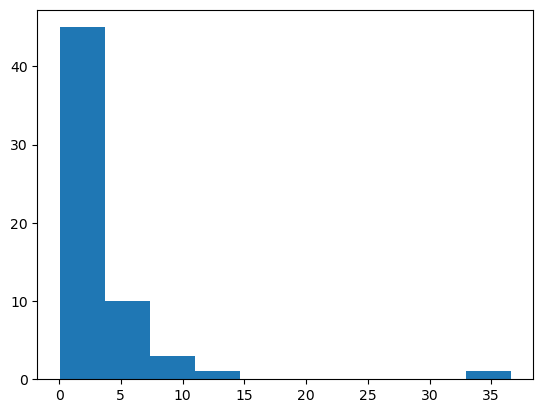

In [243]:
plt.hist(data_f['Asian'],bins=10)

#### Get Creative 15. Phew. You’ve definitely impressed your boss on your first day of work.But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

In [252]:
data_f=data_f.head()

Text(0.5, 1.0, 'population in a state')

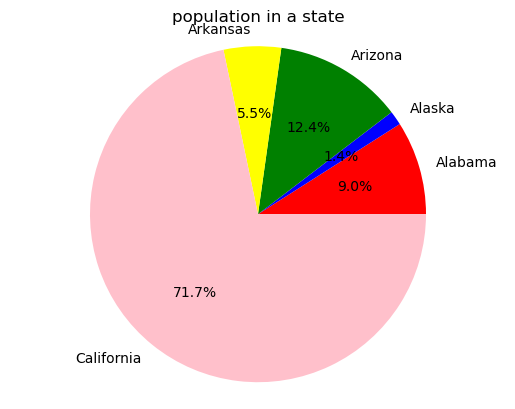

In [253]:
plt.pie(data_f['TotalPop'], labels=data_f['State'],colors= ['red', 'blue', 'green', 'yellow','pink'], autopct='%1.1f%%')
plt.axis('Equal')
plt.title('population in a state')